# Let's see if it's working

In [1]:
import torch

import matplotlib.pyplot as plt

from nn.sequential import *
from nn.activation import *
from nn.linear import *
from nn.loss import *
from trainer import Trainer

In [2]:
def gen_data(n):
    x = torch.rand((2 * n, 2))
    pi = torch.acos(torch.zeros(1)).item() * 2
    target = ((x - torch.Tensor([0.5, 0.5])).pow(2).sum(dim=1) <= 1/(2*pi)) * 1

    x_train, x_test = x[:n], x[n:]
    y_train, y_test = target[:n], target[n:]
    return x_train, x_test, y_train.view(-1, 1), y_test.view(-1, 1)

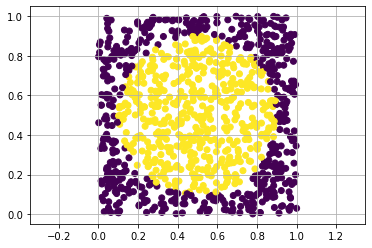

In [3]:
# Create test data
x_train, x_test, y_train, y_test = gen_data(1000)

# Plot test data
plt.scatter(x_train.numpy()[:,0], x_train.numpy()[:,1], c=y_train[:, 0])
plt.axis('equal')
plt.grid()
plt.show()

In [27]:
y_train = y_train.float()

In [28]:
y_test = y_test.float()

In [29]:
LinNet_ours = Sequential((
    Linear(2, 25),
    ReLU(),
    Linear(25, 25),
    ReLU(),
    Linear(25, 25),
    ReLU(),
    Linear(25, 1)),
    MSELoss()
)

LinNet_theirs = torch.nn.Sequential(
    torch.nn.Linear(2, 25),
    torch.nn.ReLU(),
    torch.nn.Linear(25, 25),
    torch.nn.ReLU(),
    torch.nn.Linear(25, 25),
    torch.nn.ReLU(),
    torch.nn.Linear(25, 1)
)
print(f'ours {LinNet_ours}, theirs {LinNet_theirs}')

print(Linear(25, 25))

ours Sequential(
	(0): Linear(in_features=2, out_features=25, bias=True)
	(1): ReLU()
	(2): Linear(in_features=25, out_features=25, bias=True)
	(3): ReLU()
	(4): Linear(in_features=25, out_features=25, bias=True)
	(5): ReLU()
	(6): Linear(in_features=25, out_features=1, bias=True)
), theirs Sequential(
  (0): Linear(in_features=2, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=25, bias=True)
  (3): ReLU()
  (4): Linear(in_features=25, out_features=25, bias=True)
  (5): ReLU()
  (6): Linear(in_features=25, out_features=1, bias=True)
)
Linear(in_features=25, out_features=25, bias=True)


In [30]:
out_ours = LinNet_ours(x_train)

In [31]:
out_theirs = LinNet_theirs(x_train)

In [32]:
out_ours

tensor([[-0.4808],
        [-0.4756],
        [-0.4778],
        [-0.4756],
        [-0.4752],
        [-0.4729],
        [-0.4816],
        [-0.4641],
        [-0.4820],
        [-0.4796],
        [-0.4750],
        [-0.4724],
        [-0.4766],
        [-0.4671],
        [-0.4733],
        [-0.4700],
        [-0.4791],
        [-0.4800],
        [-0.4739],
        [-0.4826],
        [-0.4803],
        [-0.4753],
        [-0.4803],
        [-0.4773],
        [-0.4803],
        [-0.4773],
        [-0.4709],
        [-0.4807],
        [-0.4771],
        [-0.4814],
        [-0.4742],
        [-0.4663],
        [-0.4813],
        [-0.4822],
        [-0.4795],
        [-0.4808],
        [-0.4819],
        [-0.4769],
        [-0.4802],
        [-0.4785],
        [-0.4795],
        [-0.4726],
        [-0.4823],
        [-0.4800],
        [-0.4745],
        [-0.4809],
        [-0.4769],
        [-0.4707],
        [-0.4794],
        [-0.4820],
        [-0.4798],
        [-0.4698],
        [-0.

In [33]:
out_theirs

tensor([[0.0457],
        [0.0358],
        [0.0425],
        [0.0464],
        [0.0406],
        [0.0366],
        [0.0535],
        [0.0332],
        [0.0450],
        [0.0490],
        [0.0448],
        [0.0344],
        [0.0364],
        [0.0416],
        [0.0427],
        [0.0428],
        [0.0460],
        [0.0379],
        [0.0346],
        [0.0458],
        [0.0458],
        [0.0448],
        [0.0396],
        [0.0446],
        [0.0455],
        [0.0447],
        [0.0422],
        [0.0414],
        [0.0398],
        [0.0447],
        [0.0336],
        [0.0426],
        [0.0420],
        [0.0489],
        [0.0390],
        [0.0456],
        [0.0463],
        [0.0360],
        [0.0448],
        [0.0419],
        [0.0368],
        [0.0370],
        [0.0452],
        [0.0481],
        [0.0361],
        [0.0456],
        [0.0383],
        [0.0406],
        [0.0366],
        [0.0502],
        [0.0385],
        [0.0432],
        [0.0504],
        [0.0389],
        [0.0418],
        [0

In [34]:
# not the same 

In [35]:
loss_ours = LinNet_ours.loss(out_ours, y_train)

In [36]:
loss_fn_theirs = torch.nn.MSELoss()

In [37]:
loss_theirs = loss_fn_theirs(out_theirs, y_train)

In [38]:
loss_ours

tensor(1.1957)

In [39]:
loss_theirs

tensor(0.4523, grad_fn=<MseLossBackward>)

In [40]:
# not the same 

In [41]:
LinNet_ours.backward()

In [42]:
LinNet_ours.update_params(optim='sgd', lr=0.01)

In [43]:
opt_theirs = torch.optim.SGD(LinNet_theirs.parameters(), lr=0.01)

In [44]:
opt_theirs.zero_grad()

In [45]:
loss_theirs.backward()

In [46]:
opt_theirs.step()

In [47]:
mod_ours = LinNet_ours.modules

In [48]:
mod_ours

(<nn.linear.Linear at 0x7f9596299e50>,
 <nn.linear.Linear at 0x7f9596299e80>)

In [49]:
mod_theirs = list(LinNet_theirs.children())

In [50]:
mod_theirs

[Linear(in_features=2, out_features=25, bias=True),
 ReLU(),
 Linear(in_features=25, out_features=25, bias=True),
 ReLU(),
 Linear(in_features=25, out_features=25, bias=True),
 ReLU(),
 Linear(in_features=25, out_features=1, bias=True)]

In [56]:
for m_ours, m_theirs in zip(mod_ours, mod_theirs):
    # for activation layers
    if 'w' not in m_ours.cache:
        break
    w_ours = m_ours.cache['w'].t()
    w_theirs = m_theirs.weight
    print('weight ours', w_ours)
    print('weight theirs', w_theirs)
    b_ours = m_ours.cache['b']
    b_theirs = m_theirs.bias
    print('bias ours', b_ours)
    print('bias theirs', b_theirs)
    

weight ours tensor([[ 0.0620, -0.1655],
        [ 0.1234, -0.0161],
        [-0.0963, -0.1252],
        [ 0.0989, -0.1180],
        [ 0.1405,  0.0707],
        [ 0.0398,  0.1018],
        [ 0.1603,  0.1213],
        [ 0.1241, -0.0669],
        [-0.1714, -0.0241],
        [ 0.0057, -0.1641],
        [ 0.0066,  0.0641],
        [ 0.1326, -0.0899],
        [ 0.0398,  0.1954],
        [ 0.1671, -0.1218],
        [-0.1663,  0.0738],
        [-0.0124, -0.1613],
        [ 0.0049, -0.0838],
        [ 0.1364, -0.0763],
        [ 0.1656, -0.0703],
        [ 0.1084, -0.0931],
        [-0.0552, -0.0680],
        [-0.1092, -0.0444],
        [ 0.1374,  0.1654],
        [-0.1690,  0.0936],
        [ 0.1227,  0.1650]])
weight theirs Parameter containing:
tensor([[-0.1115, -0.4355],
        [ 0.4031,  0.6453],
        [-0.4548, -0.0954],
        [-0.2692,  0.2965],
        [ 0.6710,  0.6811],
        [ 0.3883, -0.6351],
        [ 0.5478, -0.0592],
        [-0.1858,  0.0563],
        [ 0.6600, -0.6384],

In [57]:
# trainer stuff

In [5]:
t = Trainer(nb_epochs=321)
_ = t.fit(LinNet_ours, x_train, y_train, x_test, y_test, batch_size=32)

# Epoch 1/321:	 loss=0.25	 loss_val=0.25
# Epoch 2/321:	 loss=0.25	 loss_val=0.25
# Epoch 3/321:	 loss=0.25	 loss_val=0.25
# Epoch 4/321:	 loss=0.25	 loss_val=0.25
# Epoch 5/321:	 loss=0.25	 loss_val=0.25
# Epoch 6/321:	 loss=0.25	 loss_val=0.25
# Epoch 7/321:	 loss=0.25	 loss_val=0.25
# Epoch 8/321:	 loss=0.25	 loss_val=0.25
# Epoch 9/321:	 loss=0.25	 loss_val=0.25
# Epoch 10/321:	 loss=0.25	 loss_val=0.25
# Epoch 11/321:	 loss=0.25	 loss_val=0.25
# Epoch 12/321:	 loss=0.25	 loss_val=0.25
# Epoch 13/321:	 loss=0.25	 loss_val=0.25
# Epoch 14/321:	 loss=0.25	 loss_val=0.25
# Epoch 15/321:	 loss=0.25	 loss_val=0.25
# Epoch 16/321:	 loss=0.25	 loss_val=0.25
# Epoch 17/321:	 loss=0.25	 loss_val=0.25
# Epoch 18/321:	 loss=0.25	 loss_val=0.25
# Epoch 19/321:	 loss=0.25	 loss_val=0.25
# Epoch 20/321:	 loss=0.25	 loss_val=0.25
# Epoch 21/321:	 loss=0.25	 loss_val=0.25
# Epoch 22/321:	 loss=0.24	 loss_val=0.25
# Epoch 23/321:	 loss=0.24	 loss_val=0.25
# Epoch 24/321:	 loss=0.24	 loss_val=0.25
#

# Epoch 208/321:	 loss=0.06	 loss_val=0.06
# Epoch 209/321:	 loss=0.06	 loss_val=0.06
# Epoch 210/321:	 loss=0.05	 loss_val=0.06
# Epoch 211/321:	 loss=0.05	 loss_val=0.06
# Epoch 212/321:	 loss=0.05	 loss_val=0.06
# Epoch 213/321:	 loss=0.05	 loss_val=0.06
# Epoch 214/321:	 loss=0.05	 loss_val=0.06
# Epoch 215/321:	 loss=0.05	 loss_val=0.06
# Epoch 216/321:	 loss=0.05	 loss_val=0.06
# Epoch 217/321:	 loss=0.05	 loss_val=0.06
# Epoch 218/321:	 loss=0.05	 loss_val=0.06
# Epoch 219/321:	 loss=0.05	 loss_val=0.06
# Epoch 220/321:	 loss=0.05	 loss_val=0.06
# Epoch 221/321:	 loss=0.05	 loss_val=0.06
# Epoch 222/321:	 loss=0.05	 loss_val=0.06
# Epoch 223/321:	 loss=0.05	 loss_val=0.06
# Epoch 224/321:	 loss=0.05	 loss_val=0.06
# Epoch 225/321:	 loss=0.05	 loss_val=0.06
# Epoch 226/321:	 loss=0.05	 loss_val=0.06
# Epoch 227/321:	 loss=0.05	 loss_val=0.06
# Epoch 228/321:	 loss=0.05	 loss_val=0.06
# Epoch 229/321:	 loss=0.05	 loss_val=0.06
# Epoch 230/321:	 loss=0.05	 loss_val=0.06
# Epoch 231

In [8]:
# Iterate over samples in x
loss_fn_theirs = torch.nn.MSELoss()
optimizer_theirs = torch.optim.SGD(LinNet_theirs.parameters(), lr=0.01)
train_loss_ours = []
train_loss_theirs = []
n_epochs = 150
batch_size = 32
for e in range(n_epochs):
    for i in range(0, len(x_train), batch_size):
        # Get one data sample
        x_sample = x_train[i:i+batch_size]
        y_sample = y_train[i:i+batch_size].float()

        # Forward ours
        out_ours = LinNet_ours(x_sample)
        loss_ours = LinNet_ours.loss(out_ours, y_sample)
        train_loss_ours.append(loss_ours)
        print(f'our ours: {out_ours}')

        # Forward theirs
        out_theirs = LinNet_theirs(x_sample)
        loss_theirs = loss_fn_theirs(out_theirs, y_sample)
        train_loss_theirs.append(loss_theirs.item())
        print(f'our theirs: {out_theirs}')

        # Backward ours
        LinNet_ours.backward()

        # Backward theirs
        optimizer_theirs.zero_grad()
        loss_theirs.backward()
        optimizer_theirs.step()

        # Update params
        LinNet_ours.update_params(optim='sgd', lr=0.01)
    print(f'finished epoch {e} with train loss: {sum(train_loss_ours)/len(train_loss_ours)} (ours), {sum(train_loss_theirs)/len(train_loss_theirs)} (theirs)')

our ours: tensor([[ 1.1078],
        [ 0.1739],
        [ 0.9577],
        [ 0.8939],
        [ 0.2899],
        [ 0.0984],
        [-0.1074],
        [-0.2488],
        [ 1.0048],
        [ 0.6849],
        [-0.1357],
        [ 0.0083],
        [ 0.4076],
        [ 0.0012],
        [ 0.2394],
        [ 0.1029],
        [ 1.0490],
        [ 0.0660],
        [-0.0078],
        [ 0.9737],
        [ 1.1571],
        [-0.0486],
        [ 0.6533],
        [ 0.8411],
        [ 1.1077],
        [ 0.8520],
        [ 0.1760],
        [ 0.8678],
        [ 0.0841],
        [ 0.2669],
        [-0.0087],
        [-0.0526]])
our theirs: tensor([[0.9773],
        [0.4282],
        [0.6307],
        [0.6223],
        [0.3793],
        [0.3820],
        [0.2455],
        [0.1404],
        [0.7539],
        [0.5132],
        [0.1067],
        [0.3027],
        [0.4701],
        [0.3491],
        [0.4419],
        [0.4351],
        [0.7854],
        [0.2781],
        [0.2704],
        [0.7761],
        [

our ours: tensor([[-0.0738],
        [ 0.8907],
        [ 0.0311],
        [ 0.3676],
        [ 0.0151],
        [-0.0185],
        [ 0.0342],
        [ 0.2402],
        [ 0.9390],
        [ 0.4133],
        [ 0.0675],
        [ 0.0060],
        [ 1.0069],
        [ 0.2305],
        [-0.2626],
        [-0.0297],
        [ 1.0450],
        [ 0.0907],
        [ 0.0395],
        [ 0.8098],
        [-0.1959],
        [ 0.0617],
        [ 0.0286],
        [ 1.0424],
        [ 0.7829],
        [ 0.0175],
        [ 0.9104],
        [ 0.8865],
        [ 0.0163],
        [-0.1758],
        [-0.0460],
        [ 1.0004]])
our theirs: tensor([[ 0.2211],
        [ 0.6170],
        [ 0.3459],
        [ 0.4927],
        [ 0.2715],
        [ 0.1827],
        [ 0.3254],
        [ 0.4445],
        [ 0.7607],
        [ 0.4165],
        [ 0.3516],
        [ 0.0613],
        [ 0.7505],
        [ 0.4842],
        [ 0.1275],
        [ 0.0207],
        [ 0.8775],
        [ 0.3644],
        [ 0.3753],
        

our theirs: tensor([[ 0.9950],
        [ 0.4736],
        [ 0.5457],
        [ 0.3552],
        [ 0.5073],
        [ 0.3681],
        [ 0.6630],
        [ 0.1628],
        [ 0.3167],
        [ 0.0312],
        [ 0.5524],
        [ 0.2506],
        [-0.0629],
        [ 0.6153],
        [ 1.0606],
        [ 0.3735],
        [ 0.6090],
        [ 0.3053],
        [ 1.0812],
        [ 0.6909],
        [ 0.5833],
        [ 0.3060],
        [ 0.0358],
        [ 0.2218],
        [ 0.5671],
        [ 0.7301],
        [ 0.6372],
        [ 0.3782],
        [ 0.0428],
        [ 0.2820],
        [-0.1593],
        [ 0.4561]], grad_fn=<AddmmBackward>)
our ours: tensor([[-0.0707],
        [ 0.2077],
        [ 1.0103],
        [ 1.1744],
        [-0.0348],
        [ 0.0373],
        [ 0.8713],
        [-0.0673],
        [ 0.4171],
        [-0.1871],
        [ 1.1336],
        [ 0.8969],
        [ 0.0407],
        [ 0.9337],
        [ 0.9780],
        [ 0.0014],
        [ 0.9676],
        [-0.0340],
  

our ours: tensor([[ 0.0897],
        [ 0.0313],
        [-0.0265],
        [ 0.1635],
        [ 0.0674],
        [ 0.9444],
        [-0.0733],
        [ 0.9272],
        [-0.1062],
        [-0.0314],
        [ 1.1494],
        [ 0.6604],
        [ 0.9814],
        [ 0.0228],
        [-0.0369],
        [ 0.9047],
        [ 0.0713],
        [ 0.9391],
        [ 0.8760],
        [-0.1912],
        [ 0.9137],
        [ 0.9668],
        [ 0.6965],
        [ 0.0494],
        [ 0.8558],
        [ 0.0386],
        [-0.0095],
        [ 0.8223],
        [ 0.1290],
        [ 0.2582],
        [ 1.0617],
        [ 0.1164]])
our theirs: tensor([[ 0.2813],
        [ 0.2713],
        [-0.0390],
        [ 0.4187],
        [ 0.1514],
        [ 0.6532],
        [ 0.0913],
        [ 0.7198],
        [-0.1375],
        [ 0.1820],
        [ 1.0575],
        [ 0.4587],
        [ 0.8291],
        [ 0.1261],
        [ 0.2435],
        [ 0.5445],
        [ 0.4475],
        [ 0.6845],
        [ 0.5607],
        

our ours: tensor([[ 0.9442],
        [ 1.0165],
        [ 1.0340],
        [ 0.0688],
        [-0.1601],
        [ 0.1735],
        [ 0.9791],
        [ 0.1168],
        [ 0.8862],
        [ 0.8525],
        [ 0.8432],
        [-0.0861],
        [ 0.8432],
        [-0.0391],
        [ 1.1814],
        [ 1.0629],
        [ 0.1706],
        [ 0.1037],
        [ 0.9740],
        [ 0.3345],
        [ 0.2154],
        [-0.1577],
        [ 0.9364],
        [ 0.0585],
        [ 1.0595],
        [ 1.0316],
        [-0.1575],
        [ 0.9512],
        [ 0.0097],
        [ 1.0183],
        [ 0.4129],
        [ 0.9510]])
our theirs: tensor([[ 0.6640],
        [ 0.8692],
        [ 0.9333],
        [ 0.2005],
        [-0.0093],
        [ 0.4472],
        [ 0.7474],
        [ 0.4005],
        [ 0.5972],
        [ 0.6531],
        [ 0.5866],
        [ 0.0630],
        [ 0.5241],
        [ 0.1600],
        [ 1.2293],
        [ 0.9506],
        [ 0.3800],
        [ 0.3166],
        [ 0.7746],
        

our theirs: tensor([[0.2776],
        [0.0437],
        [0.6272],
        [1.0565],
        [0.9465],
        [1.2795],
        [0.8505],
        [0.5815],
        [0.5362],
        [1.0671],
        [0.2147],
        [0.8006],
        [0.9429],
        [0.5180],
        [0.6019],
        [0.1660],
        [0.9709],
        [0.4726],
        [0.9242],
        [0.2603],
        [0.6110],
        [1.1186],
        [0.5881],
        [0.7159],
        [0.1761],
        [0.9485],
        [0.3248],
        [0.1508],
        [0.9919],
        [0.7360],
        [0.4975],
        [0.3179]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.0376],
        [ 0.9157],
        [-0.0185],
        [ 0.9403],
        [ 0.9874],
        [ 0.0014],
        [ 0.9637],
        [ 0.5075],
        [ 0.2582],
        [ 0.1384],
        [ 0.9457],
        [ 0.0325],
        [ 0.8968],
        [ 0.8312],
        [ 0.0176],
        [-0.0721],
        [ 0.8890],
        [ 1.1078],
        [ 0.8499],
        [ 0.983

our ours: tensor([[ 0.6917],
        [ 0.8700],
        [-0.1039],
        [ 0.1252],
        [ 1.1245],
        [ 1.0020],
        [-0.1252],
        [ 0.0330],
        [ 0.0649],
        [ 0.2230],
        [ 0.6112],
        [ 0.0208],
        [ 0.6723],
        [ 0.6197],
        [ 0.1443],
        [ 0.4911],
        [ 0.3803],
        [ 0.6915],
        [ 1.0218],
        [ 0.3499],
        [-0.0339],
        [ 0.0688],
        [ 0.1568],
        [ 0.9890],
        [-0.1040],
        [ 0.9470],
        [ 0.6275],
        [ 0.2427],
        [ 0.6529],
        [ 0.9254],
        [-0.1443],
        [ 0.8473]])
our theirs: tensor([[ 0.4866],
        [ 0.5345],
        [ 0.0313],
        [ 0.2460],
        [ 1.1787],
        [ 0.8382],
        [-0.0241],
        [ 0.1652],
        [ 0.3595],
        [ 0.3623],
        [ 0.4586],
        [ 0.1921],
        [ 0.4921],
        [ 0.4548],
        [ 0.2249],
        [ 0.4047],
        [ 0.4143],
        [ 0.4535],
        [ 0.8552],
        

our theirs: tensor([[ 1.1481],
        [ 0.0709],
        [ 0.3244],
        [ 0.4452],
        [ 0.7355],
        [ 0.2979],
        [ 0.7849],
        [ 0.5190],
        [ 0.1146],
        [ 0.6550],
        [ 0.1540],
        [ 0.4668],
        [-0.0943],
        [-0.0645],
        [ 0.6184],
        [ 0.8363],
        [ 0.2036],
        [ 0.4127],
        [ 0.5779],
        [ 1.0037],
        [ 1.0517],
        [ 0.3392],
        [ 0.6683],
        [ 0.8304],
        [ 0.0726],
        [-0.1091],
        [ 0.0584],
        [ 0.1767],
        [ 1.0017],
        [ 0.2662],
        [ 0.7282],
        [ 0.2074]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.9744],
        [ 1.1061],
        [ 0.5967],
        [ 0.0737],
        [ 0.9081],
        [ 1.1875],
        [-0.1505],
        [ 0.9390],
        [ 0.8484],
        [ 0.6756],
        [-0.0667],
        [ 0.0308],
        [ 0.6086],
        [ 0.0824],
        [-0.0323],
        [ 0.2796],
        [ 0.7643],
        [ 0.4786],
  

our theirs: tensor([[0.8831],
        [1.1681],
        [0.4738],
        [1.0334],
        [0.5554],
        [0.3564],
        [0.3683],
        [0.7370],
        [0.7405],
        [1.0350],
        [0.7527],
        [0.0752],
        [1.0586],
        [0.9246],
        [0.8892],
        [0.0537],
        [0.6561],
        [0.0306],
        [0.8441],
        [0.3977],
        [0.4835],
        [0.6324],
        [0.7643],
        [0.2849],
        [0.4792],
        [0.5692],
        [1.1595],
        [1.0653],
        [0.5589],
        [0.6598],
        [0.4601],
        [0.0960]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.9391],
        [ 0.8488],
        [ 0.9858],
        [ 1.1038],
        [ 0.9237],
        [ 0.1862],
        [ 0.0853],
        [ 0.2818],
        [ 0.2564],
        [ 0.3692],
        [ 0.0890],
        [ 0.9426],
        [ 0.9532],
        [ 0.7360],
        [ 0.9918],
        [ 1.1131],
        [-0.0555],
        [ 0.1512],
        [ 0.9481],
        [ 0.987

finished epoch 34 with train loss: 0.03236415982246399 (ours), 0.0879498409207112 (theirs)
our ours: tensor([[ 1.1023],
        [ 0.1688],
        [ 0.9612],
        [ 0.9028],
        [ 0.2838],
        [ 0.0938],
        [-0.1017],
        [-0.2388],
        [ 1.0050],
        [ 0.6984],
        [-0.1377],
        [ 0.0062],
        [ 0.4100],
        [ 0.0019],
        [ 0.2345],
        [ 0.0926],
        [ 1.0472],
        [ 0.0596],
        [-0.0081],
        [ 0.9753],
        [ 1.1488],
        [-0.0534],
        [ 0.6713],
        [ 0.8555],
        [ 1.1023],
        [ 0.8669],
        [ 0.1707],
        [ 0.8744],
        [ 0.0781],
        [ 0.2601],
        [-0.0094],
        [-0.0566]])
our theirs: tensor([[ 1.2365],
        [ 0.3807],
        [ 0.8498],
        [ 0.6077],
        [ 0.3986],
        [ 0.1940],
        [-0.0459],
        [-0.0981],
        [ 0.9606],
        [ 0.5235],
        [-0.0149],
        [ 0.0496],
        [ 0.4471],
        [ 0.1074],
        [ 0.

our theirs: tensor([[ 0.0473],
        [ 0.4140],
        [ 0.9292],
        [ 1.2554],
        [ 0.0259],
        [ 0.1351],
        [ 0.6548],
        [-0.0027],
        [ 0.4979],
        [-0.0250],
        [ 1.3036],
        [ 0.6406],
        [ 0.0645],
        [ 0.7769],
        [ 0.9018],
        [ 0.0818],
        [ 0.8544],
        [ 0.0036],
        [ 0.3375],
        [ 1.1598],
        [ 0.0773],
        [ 0.7897],
        [ 0.7173],
        [ 0.5272],
        [ 0.3497],
        [ 0.5330],
        [ 0.9198],
        [ 0.3635],
        [ 0.0407],
        [ 0.1652],
        [-0.0252],
        [ 1.0482]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.0999],
        [ 0.6125],
        [ 0.9058],
        [-0.0251],
        [ 0.0829],
        [ 0.7668],
        [ 0.9146],
        [ 1.0076],
        [-0.1855],
        [-0.0914],
        [-0.0804],
        [-0.0300],
        [-0.1877],
        [-0.2612],
        [ 0.9835],
        [ 0.9708],
        [ 1.0481],
        [-0.0164],
  

our theirs: tensor([[ 0.7656],
        [ 0.9702],
        [ 1.0502],
        [ 0.1600],
        [-0.1024],
        [ 0.3767],
        [ 0.8610],
        [ 0.2963],
        [ 0.6787],
        [ 0.6129],
        [ 0.6248],
        [-0.0305],
        [ 0.5918],
        [ 0.0300],
        [ 1.3046],
        [ 1.0544],
        [ 0.3896],
        [ 0.2579],
        [ 0.8796],
        [ 0.4102],
        [ 0.3463],
        [ 0.0074],
        [ 0.7843],
        [ 0.2924],
        [ 1.0739],
        [ 0.9963],
        [-0.0071],
        [ 0.8227],
        [ 0.1737],
        [ 1.0081],
        [ 0.4701],
        [ 0.8097]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.7086],
        [-0.2347],
        [ 0.4057],
        [ 1.1152],
        [ 0.8613],
        [ 0.1034],
        [ 0.1130],
        [ 0.6975],
        [ 1.1018],
        [ 0.9073],
        [-0.1839],
        [ 0.4587],
        [ 1.0290],
        [ 0.8895],
        [ 0.8996],
        [ 0.7214],
        [ 0.0968],
        [ 0.1485],
  

our ours: tensor([[ 0.9072],
        [ 0.9786],
        [ 0.0146],
        [ 0.1602],
        [ 0.4187],
        [ 0.0728],
        [-0.0863],
        [ 0.0820],
        [ 0.0761],
        [ 0.6574],
        [ 0.3104],
        [ 0.0274],
        [ 0.0661],
        [ 1.0109],
        [ 1.0438],
        [ 1.0424],
        [ 1.0356],
        [ 0.1065],
        [-0.1439],
        [ 0.9108],
        [ 0.0534],
        [-0.0117],
        [ 0.0108],
        [ 1.0007],
        [ 1.1362],
        [ 1.0184],
        [ 0.0254],
        [ 0.8956],
        [ 0.4182],
        [ 1.0637],
        [ 1.0181],
        [ 0.9172]])
our theirs: tensor([[ 0.5942],
        [ 0.8863],
        [ 0.0788],
        [ 0.2544],
        [ 0.4453],
        [ 0.0900],
        [-0.0324],
        [ 0.2884],
        [ 0.1048],
        [ 0.4814],
        [ 0.3854],
        [ 0.0939],
        [ 0.1097],
        [ 0.9586],
        [ 1.0055],
        [ 1.1663],
        [ 0.9820],
        [ 0.2350],
        [-0.1237],
        

our ours: tensor([[ 1.0444],
        [ 0.8999],
        [ 0.0471],
        [-0.0276],
        [ 0.9909],
        [ 1.1601],
        [ 0.1042],
        [ 0.2772],
        [ 0.7582],
        [ 0.1167],
        [ 0.5629],
        [ 0.5602],
        [ 0.9211],
        [ 0.0047],
        [-0.0162],
        [-0.1826],
        [ 0.1301],
        [-0.1896],
        [ 1.0699],
        [-0.0053],
        [-0.1013],
        [-0.0313],
        [ 1.1247],
        [-0.2097],
        [ 0.9667],
        [ 0.0580],
        [ 0.0596],
        [ 0.8830],
        [-0.0306],
        [ 0.0046],
        [ 1.1063],
        [ 1.0837]])
our theirs: tensor([[ 1.0768],
        [ 0.6503],
        [ 0.1439],
        [ 0.0422],
        [ 1.0395],
        [ 1.2954],
        [ 0.2365],
        [ 0.3373],
        [ 0.5892],
        [ 0.3047],
        [ 0.4513],
        [ 0.4665],
        [ 0.7415],
        [ 0.0957],
        [-0.0282],
        [-0.0528],
        [ 0.3027],
        [-0.0581],
        [ 1.0797],
        

finished epoch 53 with train loss: 0.031885210424661636 (ours), 0.08095997321867833 (theirs)
our ours: tensor([[ 1.1002],
        [ 0.1664],
        [ 0.9631],
        [ 0.9079],
        [ 0.2760],
        [ 0.0930],
        [-0.0974],
        [-0.2311],
        [ 1.0060],
        [ 0.7079],
        [-0.1372],
        [ 0.0069],
        [ 0.4128],
        [ 0.0017],
        [ 0.2374],
        [ 0.0882],
        [ 1.0463],
        [ 0.0570],
        [-0.0084],
        [ 0.9771],
        [ 1.1451],
        [-0.0551],
        [ 0.6865],
        [ 0.8622],
        [ 1.1003],
        [ 0.8739],
        [ 0.1671],
        [ 0.8792],
        [ 0.0758],
        [ 0.2610],
        [-0.0094],
        [-0.0592]])
our theirs: tensor([[ 1.2383],
        [ 0.3264],
        [ 0.9163],
        [ 0.6451],
        [ 0.4362],
        [ 0.1740],
        [-0.0595],
        [-0.1327],
        [ 0.9449],
        [ 0.5321],
        [-0.0556],
        [ 0.0308],
        [ 0.4200],
        [ 0.0736],
        [ 

our theirs: tensor([[ 1.1436],
        [ 0.3521],
        [ 0.7492],
        [ 0.2305],
        [ 0.5534],
        [ 0.1937],
        [ 0.8306],
        [ 0.0779],
        [ 0.1247],
        [-0.0095],
        [ 0.7592],
        [ 0.0373],
        [-0.1243],
        [ 0.6345],
        [ 1.2585],
        [ 0.1527],
        [ 0.6691],
        [ 0.2917],
        [ 1.2323],
        [ 0.8049],
        [ 0.6915],
        [ 0.1450],
        [-0.0665],
        [ 0.0173],
        [ 0.5596],
        [ 0.8776],
        [ 0.5686],
        [ 0.4705],
        [ 0.0111],
        [ 0.2822],
        [-0.1902],
        [ 0.6120]], grad_fn=<AddmmBackward>)
our ours: tensor([[-0.0767],
        [ 0.2028],
        [ 1.0097],
        [ 1.1581],
        [-0.0390],
        [ 0.0325],
        [ 0.8821],
        [-0.0648],
        [ 0.4132],
        [-0.1769],
        [ 1.1224],
        [ 0.9115],
        [ 0.0367],
        [ 0.9424],
        [ 0.9845],
        [ 0.0024],
        [ 0.9734],
        [-0.0341],
  

our theirs: tensor([[ 0.9147],
        [ 1.0823],
        [ 0.5564],
        [ 0.5269],
        [ 1.1997],
        [ 0.2324],
        [ 0.2830],
        [ 0.0466],
        [ 1.1384],
        [ 0.2854],
        [ 0.0497],
        [ 0.0811],
        [ 0.7883],
        [ 0.8719],
        [ 1.2802],
        [-0.1300],
        [ 0.0682],
        [ 0.0782],
        [ 0.5093],
        [ 0.4417],
        [ 0.9922],
        [ 1.1729],
        [ 0.1402],
        [ 0.8432],
        [ 0.8712],
        [ 0.0455],
        [ 0.4872],
        [ 0.0524],
        [ 0.9801],
        [ 0.3771],
        [ 1.0241],
        [ 0.0903]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 2.2735e-02],
        [ 2.6210e-01],
        [ 1.1163e+00],
        [ 1.0482e+00],
        [ 7.7295e-01],
        [ 9.6122e-01],
        [ 3.7684e-01],
        [-2.6640e-02],
        [ 9.3957e-01],
        [-8.8072e-04],
        [ 1.0283e+00],
        [ 1.0966e+00],
        [ 7.5911e-02],
        [-1.8954e-01],
        [ 1.3633e-02],

our theirs: tensor([[ 1.0444],
        [ 0.0178],
        [-0.0272],
        [ 1.1601],
        [ 0.5720],
        [ 0.9773],
        [ 1.1408],
        [ 0.1497],
        [ 0.0770],
        [ 0.2561],
        [ 0.0571],
        [-0.1303],
        [ 0.2565],
        [ 1.1105],
        [ 0.8298],
        [ 0.0688],
        [ 0.9608],
        [ 0.0408],
        [ 0.3019],
        [ 0.4204],
        [ 0.7726],
        [ 0.3909],
        [ 0.1580],
        [ 0.3347],
        [-0.2727],
        [ 1.2048],
        [ 1.1361],
        [ 0.9742],
        [ 0.9539],
        [ 0.4336],
        [ 0.6096],
        [ 0.2605]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.0868],
        [ 0.0259],
        [-0.0208],
        [ 0.1552],
        [ 0.0631],
        [ 0.9519],
        [-0.0617],
        [ 0.9355],
        [-0.0933],
        [-0.0261],
        [ 1.1377],
        [ 0.6915],
        [ 0.9858],
        [ 0.0208],
        [-0.0371],
        [ 0.9168],
        [ 0.0631],
        [ 0.9503],
  

our theirs: tensor([[ 0.5371],
        [ 0.6273],
        [-0.0449],
        [ 0.1774],
        [ 1.2152],
        [ 0.9844],
        [-0.0704],
        [ 0.0604],
        [ 0.2406],
        [ 0.2684],
        [ 0.4906],
        [ 0.1176],
        [ 0.5017],
        [ 0.4752],
        [ 0.2385],
        [ 0.4822],
        [ 0.3469],
        [ 0.5119],
        [ 0.9535],
        [ 0.3629],
        [-0.0078],
        [ 0.1319],
        [ 0.2819],
        [ 0.9105],
        [-0.0461],
        [ 0.8010],
        [ 0.4659],
        [ 0.3093],
        [ 0.4945],
        [ 0.7297],
        [-0.1563],
        [ 0.6268]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.9401],
        [ 0.2218],
        [ 0.1653],
        [ 0.7003],
        [ 0.9138],
        [ 0.0643],
        [ 1.0387],
        [ 1.0100],
        [ 0.3786],
        [ 1.0525],
        [ 1.0263],
        [ 0.0355],
        [ 0.9663],
        [ 0.9722],
        [ 0.9426],
        [ 0.9103],
        [ 1.1263],
        [ 0.9449],
  

our ours: tensor([[ 0.9806],
        [ 1.1026],
        [ 0.5470],
        [ 1.0759],
        [ 0.7898],
        [ 0.0543],
        [ 0.2050],
        [ 0.9319],
        [ 0.9234],
        [ 1.0708],
        [ 0.9192],
        [-0.0469],
        [ 1.0699],
        [ 0.9821],
        [ 1.0061],
        [ 0.0033],
        [ 0.8982],
        [-0.0249],
        [ 0.9553],
        [ 0.3239],
        [ 0.5546],
        [ 0.9312],
        [ 0.9345],
        [ 0.0774],
        [ 0.5319],
        [ 0.9070],
        [ 1.1138],
        [ 1.0903],
        [ 0.7733],
        [ 0.9012],
        [ 0.4524],
        [-0.0340]])
our theirs: tensor([[ 0.9315],
        [ 1.1736],
        [ 0.4896],
        [ 1.1010],
        [ 0.6187],
        [ 0.2846],
        [ 0.3502],
        [ 0.7748],
        [ 0.7692],
        [ 1.0615],
        [ 0.8081],
        [ 0.0307],
        [ 1.1056],
        [ 0.9793],
        [ 0.9523],
        [ 0.0502],
        [ 0.6566],
        [-0.0071],
        [ 0.9340],
        

our ours: tensor([[ 0.0945],
        [ 0.6229],
        [ 0.9168],
        [-0.0338],
        [ 0.0779],
        [ 0.7953],
        [ 0.9217],
        [ 1.0086],
        [-0.1807],
        [-0.0928],
        [-0.0782],
        [-0.0361],
        [-0.1813],
        [-0.2496],
        [ 0.9865],
        [ 0.9714],
        [ 1.0457],
        [-0.0161],
        [ 0.9563],
        [ 0.0582],
        [ 0.5001],
        [ 0.9658],
        [-0.0076],
        [ 1.0701],
        [ 0.6388],
        [ 0.9861],
        [ 0.3583],
        [ 0.7978],
        [ 0.1013],
        [ 0.6475],
        [ 1.1392],
        [-0.0475]])
our theirs: tensor([[ 0.1127],
        [ 0.5283],
        [ 0.7049],
        [ 0.0844],
        [ 0.1850],
        [ 0.6375],
        [ 0.8303],
        [ 0.9641],
        [-0.1549],
        [-0.0620],
        [ 0.0087],
        [ 0.0526],
        [-0.0824],
        [-0.1308],
        [ 0.9546],
        [ 0.8970],
        [ 1.2071],
        [ 0.0646],
        [ 0.8122],
        

our ours: tensor([[ 0.9866],
        [ 1.0193],
        [ 0.8335],
        [ 0.7859],
        [ 1.0772],
        [ 0.1140],
        [ 0.1448],
        [-0.0079],
        [ 1.0923],
        [ 0.1187],
        [-0.0490],
        [ 0.0059],
        [ 0.9378],
        [ 0.9929],
        [ 1.1594],
        [-0.1258],
        [ 0.0691],
        [-0.0151],
        [ 0.5700],
        [ 0.4952],
        [ 1.0063],
        [ 1.0809],
        [ 0.0572],
        [ 0.9709],
        [ 0.9694],
        [ 0.0162],
        [ 0.6079],
        [ 0.0280],
        [ 1.0065],
        [ 0.2394],
        [ 1.0473],
        [ 0.0105]])
our theirs: tensor([[ 0.9222],
        [ 1.1007],
        [ 0.5721],
        [ 0.5451],
        [ 1.2006],
        [ 0.2246],
        [ 0.2817],
        [ 0.0415],
        [ 1.1348],
        [ 0.2701],
        [ 0.0296],
        [ 0.0856],
        [ 0.7922],
        [ 0.8857],
        [ 1.2828],
        [-0.1450],
        [ 0.0546],
        [ 0.0623],
        [ 0.5063],
        

our theirs: tensor([[ 0.8342],
        [ 0.7301],
        [ 0.9554],
        [ 1.1574],
        [ 0.7485],
        [ 0.3145],
        [ 0.2029],
        [ 0.3279],
        [ 0.3457],
        [ 0.4193],
        [ 0.2224],
        [ 0.7609],
        [ 0.9643],
        [ 0.6780],
        [ 0.9511],
        [ 1.3029],
        [-0.0341],
        [ 0.2674],
        [ 0.8626],
        [ 0.8947],
        [ 1.1332],
        [ 0.3672],
        [ 1.2331],
        [ 0.4733],
        [ 0.2011],
        [ 0.3708],
        [-0.0118],
        [ 0.0845],
        [ 1.0128],
        [ 0.6754],
        [ 0.5319],
        [ 0.8034]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.0276e+00],
        [ 1.8785e-02],
        [-7.8142e-05],
        [ 9.4679e-01],
        [ 1.0527e+00],
        [ 4.2590e-01],
        [ 9.5014e-01],
        [ 1.0847e+00],
        [-2.8449e-03],
        [ 1.0428e+00],
        [ 8.8133e-01],
        [ 8.1428e-01],
        [ 1.0190e+00],
        [ 3.9335e-02],
        [-1.2170e-01],

our ours: tensor([[ 0.0933],
        [ 0.6234],
        [ 0.9200],
        [-0.0355],
        [ 0.0757],
        [ 0.8045],
        [ 0.9235],
        [ 1.0086],
        [-0.1799],
        [-0.0931],
        [-0.0779],
        [-0.0378],
        [-0.1788],
        [-0.2466],
        [ 0.9867],
        [ 0.9716],
        [ 1.0444],
        [-0.0164],
        [ 0.9575],
        [ 0.0571],
        [ 0.4951],
        [ 0.9665],
        [-0.0096],
        [ 1.0685],
        [ 0.6424],
        [ 0.9868],
        [ 0.3508],
        [ 0.8014],
        [ 0.0995],
        [ 0.6540],
        [ 1.1358],
        [-0.0469]])
our theirs: tensor([[ 0.1078],
        [ 0.5276],
        [ 0.7144],
        [ 0.0771],
        [ 0.1828],
        [ 0.6338],
        [ 0.8423],
        [ 0.9613],
        [-0.1706],
        [-0.0657],
        [-0.0024],
        [ 0.0511],
        [-0.1005],
        [-0.1404],
        [ 0.9472],
        [ 0.9029],
        [ 1.2034],
        [ 0.0564],
        [ 0.8192],
        

finished epoch 89 with train loss: 0.030999217182397842 (ours), 0.07352817548413036 (theirs)
our ours: tensor([[ 1.0945],
        [ 0.1584],
        [ 0.9671],
        [ 0.9177],
        [ 0.2683],
        [ 0.0874],
        [-0.0900],
        [-0.2205],
        [ 1.0075],
        [ 0.7229],
        [-0.1339],
        [ 0.0041],
        [ 0.4202],
        [ 0.0034],
        [ 0.2316],
        [ 0.0802],
        [ 1.0448],
        [ 0.0506],
        [-0.0114],
        [ 0.9805],
        [ 1.1362],
        [-0.0562],
        [ 0.7023],
        [ 0.8770],
        [ 1.0947],
        [ 0.8862],
        [ 0.1618],
        [ 0.8877],
        [ 0.0715],
        [ 0.2519],
        [-0.0127],
        [-0.0608]])
our theirs: tensor([[ 1.2446],
        [ 0.3021],
        [ 0.9071],
        [ 0.6801],
        [ 0.4373],
        [ 0.1635],
        [-0.0818],
        [-0.1547],
        [ 0.9608],
        [ 0.5541],
        [-0.1061],
        [ 0.0248],
        [ 0.4276],
        [ 0.0510],
        [ 

our ours: tensor([[ 0.7317],
        [-0.2179],
        [ 0.3942],
        [ 1.1059],
        [ 0.8888],
        [ 0.0936],
        [ 0.0843],
        [ 0.7132],
        [ 1.0938],
        [ 0.9190],
        [-0.1714],
        [ 0.4640],
        [ 1.0284],
        [ 0.9017],
        [ 0.9104],
        [ 0.7318],
        [ 0.0939],
        [ 0.1424],
        [-0.0096],
        [ 0.6033],
        [ 1.0285],
        [ 0.1496],
        [ 0.9922],
        [ 0.0643],
        [-0.0186],
        [-0.0373],
        [ 0.1590],
        [ 1.0685],
        [ 0.0363],
        [-0.0147],
        [ 0.0643],
        [-0.2209]])
our theirs: tensor([[ 0.5674],
        [-0.2743],
        [ 0.3948],
        [ 1.1810],
        [ 0.6148],
        [ 0.2254],
        [ 0.3184],
        [ 0.5422],
        [ 1.1611],
        [ 0.7105],
        [-0.1942],
        [ 0.4047],
        [ 1.0172],
        [ 0.7616],
        [ 0.7848],
        [ 0.6267],
        [ 0.1721],
        [ 0.2949],
        [ 0.2039],
        

our theirs: tensor([[ 1.0677e+00],
        [ 7.0632e-01],
        [ 1.3397e-01],
        [ 1.3539e-02],
        [ 1.0986e+00],
        [ 1.2870e+00],
        [ 2.4738e-01],
        [ 3.2549e-01],
        [ 6.3568e-01],
        [ 2.6272e-01],
        [ 4.8767e-01],
        [ 4.9017e-01],
        [ 8.0076e-01],
        [ 7.4175e-02],
        [-1.0912e-02],
        [-6.5649e-02],
        [ 2.9065e-01],
        [-9.6713e-02],
        [ 1.1324e+00],
        [-4.3412e-03],
        [-1.2673e-02],
        [-8.5828e-04],
        [ 1.1904e+00],
        [-1.0189e-01],
        [ 9.2540e-01],
        [ 1.4630e-01],
        [ 1.9081e-01],
        [ 6.9290e-01],
        [ 1.2321e-01],
        [ 8.2015e-02],
        [ 1.1894e+00],
        [ 1.1285e+00]], grad_fn=<AddmmBackward>)
our ours: tensor([[-0.1636],
        [-0.0807],
        [ 0.3032],
        [ 0.9608],
        [ 0.2833],
        [ 0.6084],
        [ 0.9722],
        [ 0.2720],
        [ 0.8874],
        [ 0.3476],
        [ 0.8816],
       

finished epoch 100 with train loss: 0.030737755820155144 (ours), 0.07200038587181175 (theirs)
our ours: tensor([[ 1.0916],
        [ 0.1546],
        [ 0.9681],
        [ 0.9207],
        [ 0.2598],
        [ 0.0860],
        [-0.0894],
        [-0.2167],
        [ 1.0070],
        [ 0.7202],
        [-0.1340],
        [ 0.0035],
        [ 0.4191],
        [ 0.0041],
        [ 0.2238],
        [ 0.0758],
        [ 1.0442],
        [ 0.0483],
        [-0.0138],
        [ 0.9806],
        [ 1.1320],
        [-0.0578],
        [ 0.7026],
        [ 0.8831],
        [ 1.0918],
        [ 0.8896],
        [ 0.1604],
        [ 0.8901],
        [ 0.0682],
        [ 0.2389],
        [-0.0152],
        [-0.0607]])
our theirs: tensor([[ 1.2419],
        [ 0.3012],
        [ 0.9049],
        [ 0.6919],
        [ 0.4361],
        [ 0.1634],
        [-0.0859],
        [-0.1658],
        [ 0.9716],
        [ 0.5596],
        [-0.1174],
        [ 0.0200],
        [ 0.4297],
        [ 0.0466],
        [

our theirs: tensor([[ 0.8297],
        [ 0.9797],
        [ 1.0216],
        [ 0.1186],
        [-0.1531],
        [ 0.3126],
        [ 0.9132],
        [ 0.2416],
        [ 0.7369],
        [ 0.6033],
        [ 0.6525],
        [-0.0558],
        [ 0.6454],
        [-0.0127],
        [ 1.2829],
        [ 1.0551],
        [ 0.3619],
        [ 0.1850],
        [ 0.9016],
        [ 0.4154],
        [ 0.2953],
        [-0.0815],
        [ 0.8478],
        [ 0.2640],
        [ 1.1000],
        [ 1.0466],
        [-0.0282],
        [ 0.8626],
        [ 0.1144],
        [ 0.9919],
        [ 0.4419],
        [ 0.8726]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.7469],
        [-0.2112],
        [ 0.4036],
        [ 1.1051],
        [ 0.8934],
        [ 0.0944],
        [ 0.0870],
        [ 0.7278],
        [ 1.0933],
        [ 0.9234],
        [-0.1673],
        [ 0.4775],
        [ 1.0308],
        [ 0.9062],
        [ 0.9145],
        [ 0.7561],
        [ 0.0964],
        [ 0.1444],
  

our ours: tensor([[ 9.8175e-01],
        [ 1.0911e+00],
        [ 5.9640e-01],
        [ 7.1249e-02],
        [ 9.2913e-01],
        [ 1.1589e+00],
        [-1.3095e-01],
        [ 9.4935e-01],
        [ 8.7256e-01],
        [ 7.1174e-01],
        [-6.4652e-02],
        [ 2.2729e-02],
        [ 6.0460e-01],
        [ 7.9118e-02],
        [-3.4054e-02],
        [ 2.5585e-01],
        [ 8.0022e-01],
        [ 4.7182e-01],
        [ 1.1230e+00],
        [ 3.7859e-01],
        [-4.5907e-03],
        [ 9.0930e-01],
        [ 1.0004e+00],
        [ 3.2150e-01],
        [ 3.1335e-02],
        [-2.3788e-04],
        [ 7.7621e-01],
        [ 9.3043e-01],
        [ 1.1434e+00],
        [ 5.0010e-02],
        [ 9.5672e-01],
        [ 1.1466e-01]])
our theirs: tensor([[ 0.9072],
        [ 1.1949],
        [ 0.4994],
        [ 0.1095],
        [ 0.6673],
        [ 1.2940],
        [-0.1161],
        [ 0.9138],
        [ 0.5637],
        [ 0.5642],
        [-0.0913],
        [ 0.0625],
        [ 0.4

our theirs: tensor([[ 1.0438],
        [ 1.0422],
        [-0.0108],
        [ 0.0516],
        [ 0.4097],
        [-0.0477],
        [ 0.7434],
        [ 0.1762],
        [ 0.4883],
        [ 0.5580],
        [ 0.0263],
        [ 1.1990],
        [ 1.1985],
        [ 0.7351],
        [-0.1853],
        [ 0.9424],
        [ 0.0696],
        [-0.0528],
        [ 0.5229],
        [ 0.8033],
        [ 0.0189],
        [ 0.4231],
        [ 1.1328],
        [ 0.0615],
        [ 1.1524],
        [ 1.2866],
        [ 0.1016],
        [ 0.0973],
        [ 0.1165],
        [ 0.1111],
        [ 0.7304],
        [ 0.0818]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.0238],
        [-0.1609],
        [ 0.9829],
        [ 0.2716],
        [ 0.0412],
        [ 0.0258],
        [ 0.1400],
        [ 0.9665]])
our theirs: tensor([[ 1.0098],
        [-0.2470],
        [ 0.9150],
        [ 0.3481],
        [ 0.1423],
        [ 0.1262],
        [ 0.3523],
        [ 0.8338]], grad_fn=<AddmmBackward>)
f

our theirs: tensor([[ 0.6655],
        [ 0.9228],
        [ 0.0588],
        [ 0.1971],
        [ 0.4149],
        [ 0.0993],
        [-0.1027],
        [ 0.2105],
        [ 0.1110],
        [ 0.4685],
        [ 0.3978],
        [ 0.0484],
        [ 0.1138],
        [ 1.0031],
        [ 1.0464],
        [ 1.1849],
        [ 1.0254],
        [ 0.2214],
        [-0.1800],
        [ 0.7264],
        [ 0.1107],
        [ 0.1230],
        [ 0.0048],
        [ 0.9531],
        [ 1.2663],
        [ 0.9838],
        [ 0.0630],
        [ 0.6712],
        [ 0.4518],
        [ 1.0960],
        [ 1.0495],
        [ 0.8317]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.9896],
        [ 1.0198],
        [ 0.8662],
        [ 0.7862],
        [ 1.0718],
        [ 0.1072],
        [ 0.1362],
        [-0.0045],
        [ 1.0855],
        [ 0.1031],
        [-0.0521],
        [ 0.0055],
        [ 0.9445],
        [ 0.9961],
        [ 1.1474],
        [-0.1171],
        [ 0.0635],
        [-0.0192],
  

finished epoch 118 with train loss: 0.030314385890960693 (ours), 0.06988406158443697 (theirs)
our ours: tensor([[ 1.0895],
        [ 0.1515],
        [ 0.9703],
        [ 0.9260],
        [ 0.2652],
        [ 0.0843],
        [-0.0832],
        [-0.2104],
        [ 1.0084],
        [ 0.7392],
        [-0.1300],
        [ 0.0033],
        [ 0.4254],
        [ 0.0058],
        [ 0.2354],
        [ 0.0734],
        [ 1.0439],
        [ 0.0485],
        [-0.0143],
        [ 0.9831],
        [ 1.1284],
        [-0.0576],
        [ 0.7218],
        [ 0.8919],
        [ 1.0896],
        [ 0.8952],
        [ 0.1588],
        [ 0.8964],
        [ 0.0681],
        [ 0.2431],
        [-0.0162],
        [-0.0601]])
our theirs: tensor([[ 1.2396],
        [ 0.3082],
        [ 0.9045],
        [ 0.7197],
        [ 0.4441],
        [ 0.1601],
        [-0.0919],
        [-0.1820],
        [ 0.9920],
        [ 0.5803],
        [-0.1196],
        [ 0.0131],
        [ 0.4382],
        [ 0.0440],
        [

our theirs: tensor([[ 1.0386],
        [ 0.8175],
        [-0.0371],
        [ 0.8515],
        [ 1.0067],
        [ 0.0363],
        [ 0.8897],
        [ 0.4764],
        [ 0.3322],
        [ 0.2170],
        [ 0.8642],
        [ 0.0679],
        [ 0.8157],
        [ 0.6395],
        [ 0.1179],
        [-0.1184],
        [ 0.7915],
        [ 1.2177],
        [ 0.6848],
        [ 0.9297],
        [ 0.6096],
        [ 0.2488],
        [ 0.9051],
        [ 0.9768],
        [ 0.1341],
        [ 0.5753],
        [ 0.1796],
        [ 1.0314],
        [ 0.0247],
        [ 0.2121],
        [ 0.9741],
        [ 0.9061]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.0265],
        [ 1.1057],
        [-0.1161],
        [ 0.0021],
        [ 0.6600],
        [ 0.9023],
        [ 0.4973],
        [-0.0765],
        [ 0.1104],
        [-0.0600],
        [ 0.2840],
        [ 1.0523],
        [ 0.9101],
        [ 1.0703],
        [ 0.1587],
        [ 0.1013],
        [ 0.9223],
        [ 1.0707],
  

our theirs: tensor([[ 0.0780],
        [ 0.1168],
        [-0.1127],
        [ 1.2341],
        [ 0.6943],
        [ 0.1408],
        [ 1.0495],
        [-0.1359],
        [ 0.9426],
        [ 0.3488],
        [ 0.7896],
        [-0.0475],
        [ 0.4135],
        [ 1.1134],
        [ 0.8199],
        [ 0.8468],
        [ 0.3949],
        [ 1.0644],
        [ 0.8681],
        [-0.0613],
        [-0.2409],
        [ 0.6815],
        [ 0.8428],
        [ 0.6596],
        [ 0.4068],
        [ 0.8439],
        [-0.0164],
        [ 1.2227],
        [ 0.2184],
        [ 0.5975],
        [ 0.0471],
        [ 1.0849]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.9848],
        [ 1.0921],
        [ 0.5531],
        [ 1.0679],
        [ 0.8100],
        [ 0.0434],
        [ 0.1933],
        [ 0.9410],
        [ 0.9346],
        [ 1.0654],
        [ 0.9295],
        [-0.0469],
        [ 1.0647],
        [ 0.9856],
        [ 1.0071],
        [ 0.0019],
        [ 0.9106],
        [-0.0230],
  

our theirs: tensor([[ 0.8489],
        [ 0.9682],
        [ 1.0128],
        [ 0.1040],
        [-0.1702],
        [ 0.3064],
        [ 0.9356],
        [ 0.2473],
        [ 0.7366],
        [ 0.6048],
        [ 0.6607],
        [-0.0675],
        [ 0.6677],
        [-0.0268],
        [ 1.2671],
        [ 1.0466],
        [ 0.3633],
        [ 0.1851],
        [ 0.8965],
        [ 0.4215],
        [ 0.2885],
        [-0.0978],
        [ 0.8490],
        [ 0.2589],
        [ 1.0788],
        [ 1.0352],
        [-0.0512],
        [ 0.8696],
        [ 0.1099],
        [ 0.9846],
        [ 0.4258],
        [ 0.8735]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.7493],
        [-0.2022],
        [ 0.3964],
        [ 1.0989],
        [ 0.9010],
        [ 0.0911],
        [ 0.0658],
        [ 0.7332],
        [ 1.0878],
        [ 0.9298],
        [-0.1603],
        [ 0.4811],
        [ 1.0285],
        [ 0.9121],
        [ 0.9199],
        [ 0.7619],
        [ 0.0961],
        [ 0.1414],
  

our theirs: tensor([[ 0.9244],
        [ 1.1567],
        [ 0.4926],
        [ 1.0977],
        [ 0.6555],
        [ 0.2333],
        [ 0.3751],
        [ 0.8210],
        [ 0.8004],
        [ 1.0563],
        [ 0.8560],
        [ 0.0099],
        [ 1.1067],
        [ 1.0138],
        [ 0.9539],
        [ 0.0457],
        [ 0.6923],
        [-0.0079],
        [ 0.9840],
        [ 0.4287],
        [ 0.5084],
        [ 0.7756],
        [ 0.8871],
        [ 0.2209],
        [ 0.4808],
        [ 0.6560],
        [ 1.1697],
        [ 1.1039],
        [ 0.6225],
        [ 0.8026],
        [ 0.4894],
        [ 0.0302]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 9.4996e-01],
        [ 8.7333e-01],
        [ 9.8979e-01],
        [ 1.0882e+00],
        [ 9.4405e-01],
        [ 1.7266e-01],
        [ 7.5342e-02],
        [ 2.1721e-01],
        [ 2.1360e-01],
        [ 3.8844e-01],
        [ 6.0354e-02],
        [ 9.6368e-01],
        [ 9.6167e-01],
        [ 7.4069e-01],
        [ 9.9749e-01],

our theirs: tensor([[ 0.8551],
        [ 0.9643],
        [ 1.0115],
        [ 0.1045],
        [-0.1732],
        [ 0.3084],
        [ 0.9393],
        [ 0.2523],
        [ 0.7359],
        [ 0.6055],
        [ 0.6623],
        [-0.0693],
        [ 0.6740],
        [-0.0280],
        [ 1.2637],
        [ 1.0437],
        [ 0.3673],
        [ 0.1838],
        [ 0.8956],
        [ 0.4230],
        [ 0.2851],
        [-0.0999],
        [ 0.8511],
        [ 0.2569],
        [ 1.0754],
        [ 1.0301],
        [-0.0565],
        [ 0.8693],
        [ 0.1078],
        [ 0.9834],
        [ 0.4209],
        [ 0.8760]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.7545],
        [-0.1999],
        [ 0.3980],
        [ 1.0977],
        [ 0.9032],
        [ 0.0904],
        [ 0.0631],
        [ 0.7397],
        [ 1.0867],
        [ 0.9319],
        [-0.1578],
        [ 0.4856],
        [ 1.0287],
        [ 0.9141],
        [ 0.9217],
        [ 0.7671],
        [ 0.0960],
        [ 0.1407],
  

our theirs: tensor([[ 0.0781],
        [ 0.1206],
        [-0.1207],
        [ 1.2260],
        [ 0.7052],
        [ 0.1445],
        [ 1.0466],
        [-0.1386],
        [ 0.9477],
        [ 0.3401],
        [ 0.7881],
        [-0.0530],
        [ 0.4079],
        [ 1.1075],
        [ 0.8321],
        [ 0.8532],
        [ 0.3857],
        [ 1.0603],
        [ 0.8819],
        [-0.0655],
        [-0.2437],
        [ 0.6924],
        [ 0.8472],
        [ 0.6689],
        [ 0.3939],
        [ 0.8461],
        [-0.0247],
        [ 1.2178],
        [ 0.2213],
        [ 0.6056],
        [ 0.0471],
        [ 1.0805]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 9.8546e-01],
        [ 1.0885e+00],
        [ 5.5643e-01],
        [ 1.0657e+00],
        [ 8.1705e-01],
        [ 3.9790e-02],
        [ 1.9043e-01],
        [ 9.4237e-01],
        [ 9.3680e-01],
        [ 1.0628e+00],
        [ 9.3100e-01],
        [-4.7152e-02],
        [ 1.0626e+00],
        [ 9.8560e-01],
        [ 1.0073e+00],

our theirs: tensor([[ 1.0472],
        [ 0.8244],
        [-0.0386],
        [ 0.8673],
        [ 1.0082],
        [ 0.0375],
        [ 0.9052],
        [ 0.4801],
        [ 0.3393],
        [ 0.2204],
        [ 0.8786],
        [ 0.0668],
        [ 0.8267],
        [ 0.6717],
        [ 0.1175],
        [-0.1276],
        [ 0.8027],
        [ 1.2140],
        [ 0.6821],
        [ 0.9338],
        [ 0.6238],
        [ 0.2314],
        [ 0.9103],
        [ 0.9926],
        [ 0.1369],
        [ 0.6000],
        [ 0.1839],
        [ 1.0458],
        [ 0.0226],
        [ 0.2212],
        [ 0.9811],
        [ 0.9175]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.0248],
        [ 1.0992],
        [-0.1128],
        [-0.0049],
        [ 0.6512],
        [ 0.9067],
        [ 0.4829],
        [-0.0744],
        [ 0.0820],
        [-0.0621],
        [ 0.2588],
        [ 1.0485],
        [ 0.9156],
        [ 1.0657],
        [ 0.1346],
        [ 0.0951],
        [ 0.9250],
        [ 1.0661],
  

our ours: tensor([[ 0.9845],
        [ 0.4637],
        [ 0.0738],
        [ 1.0811],
        [ 1.0191],
        [-0.0348],
        [ 1.0539],
        [ 0.9884],
        [ 0.0627],
        [-0.0398],
        [ 1.0195],
        [ 0.9458],
        [-0.0992],
        [ 1.1142],
        [-0.0192],
        [-0.2135],
        [ 0.0528],
        [ 0.6234],
        [ 0.0800],
        [ 0.0806],
        [ 0.5559],
        [ 0.0915],
        [ 0.3855],
        [-0.0464],
        [ 0.9928],
        [-0.0986],
        [ 0.9475],
        [-0.0094],
        [ 0.0579],
        [ 1.0155],
        [ 0.1162],
        [ 0.9537]])
our theirs: tensor([[ 0.8807],
        [ 0.3669],
        [ 0.2129],
        [ 1.2285],
        [ 1.0748],
        [-0.1213],
        [ 1.0722],
        [ 0.9072],
        [ 0.0874],
        [-0.0228],
        [ 0.9941],
        [ 0.9010],
        [-0.1784],
        [ 1.2423],
        [ 0.0624],
        [-0.3721],
        [ 0.0447],
        [ 0.5050],
        [ 0.1947],
        